In [37]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from NV import *

def T1Fit(t,I_inf,C_m,T_m,C_1,T_1):
         return I_inf * (1 - C_m*np.exp(-t/T_m) + C_1*np.exp(-t/T_1))

[  2.83519865e+00   8.63582710e-03   1.95699062e+00   3.91732912e+02
   1.00419924e+02]


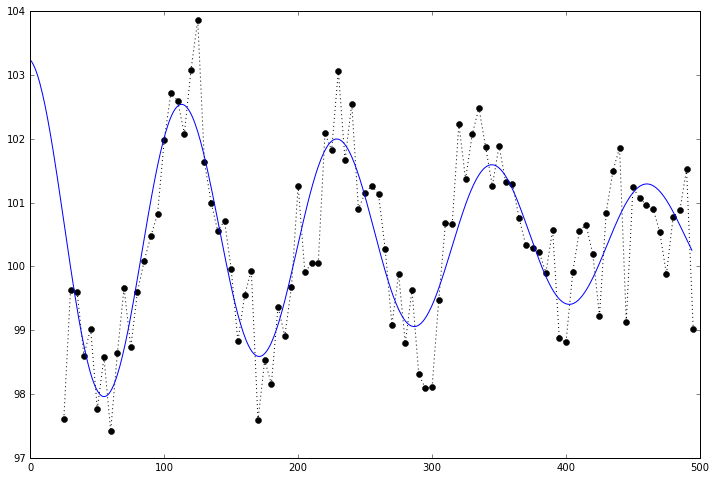

In [30]:
def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y97 2 Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y97 2 Rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0

[  3.27577837e+00   1.69144541e-02  -2.61724584e+00   6.90564225e+02
   1.00398726e+02]


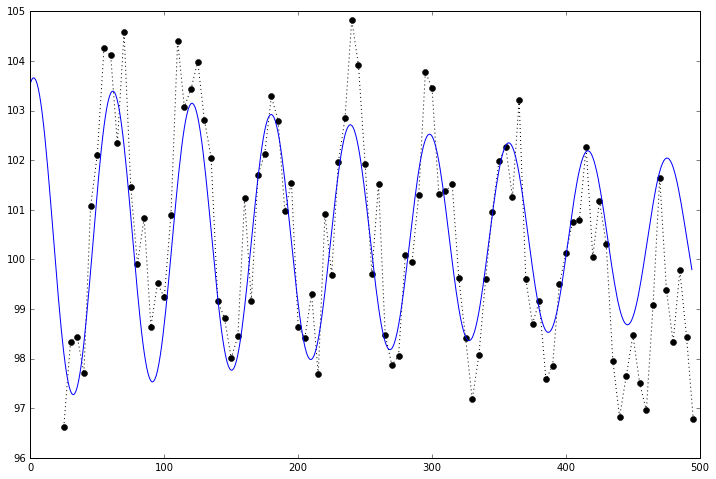

In [78]:
def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\9-21-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm  rabi *[3-9]',
              r'C:\Users\Ouyang Group\Documents\Data\9-21-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm  rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,15E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0

[ -3.04965749e+00   1.58956316e-02  -9.82480277e+01   1.28992077e+03
   1.00445816e+02]


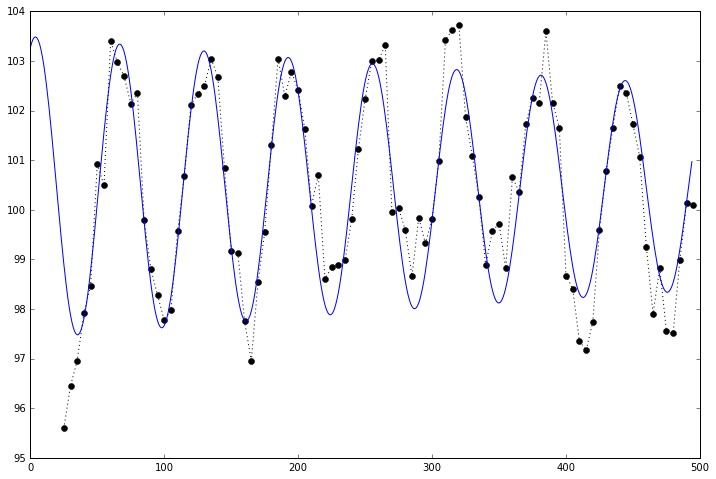

In [38]:
def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

time,rabi0 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y97 -4dbm Rabi *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y97 -4dbm Rabi Pulse Seq')
rabi0 = 100*rabi0/np.mean(rabi0)
opt0,cov0 = curve_fit(RabiFit,time[1:],rabi0[1:],maxfev=5500,p0=(600,10E-3,0,200,28000))
t = np.arange(0,np.max(time),1)
plt.plot(time[1:],rabi0[1:],'ko:')
plt.plot(t,RabiFit(t,*opt0),'b-')
print opt0

[ 4460708.36511766  4663027.54647728 -4433331.04041821]
(26894.25, 0.0060977593555260525, 0.012886353356195231)


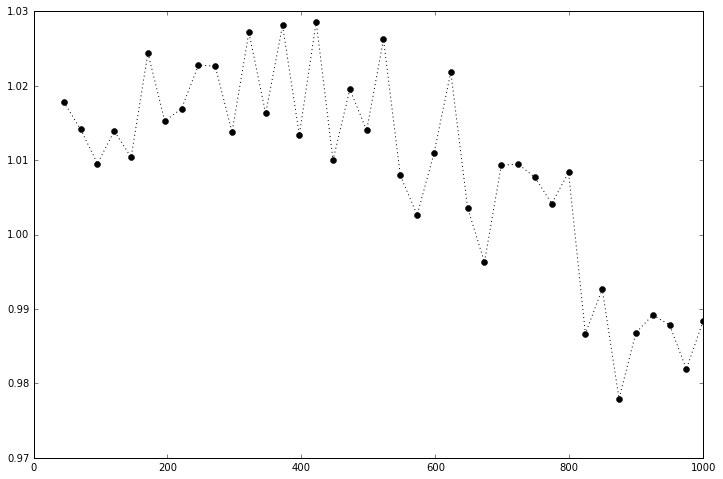

In [55]:
def EPR(EPRfiles,Pfiles):
    files = glob.glob(EPRfiles)
    pseq = np.loadtxt(Pfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = (epr[:,0]-epr[:,1])
        diff[np.isinf(diff)] = 0
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0]- (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)        
    return pseq,d_sum

def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,1]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D

time,hahn0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm Hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm Hahn Pulse Seq')
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm Hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm Hahn Pulse Seq')
hahn0 = hahn0#-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(80,2600,-np.min(hahn0)))
t = np.arange(10,np.max(time),1)
#plt.plot(t,T2Fit(t,*opt0),'b-')
plt.plot(time[1:],hahn1[1:]/np.mean(hahn1[-20:]),'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

[ 7925187.07230414  5363857.95798449 -7684943.54027355]
(238660.20408163266, 0.0020469630167431075, 0.0022142632536554965)


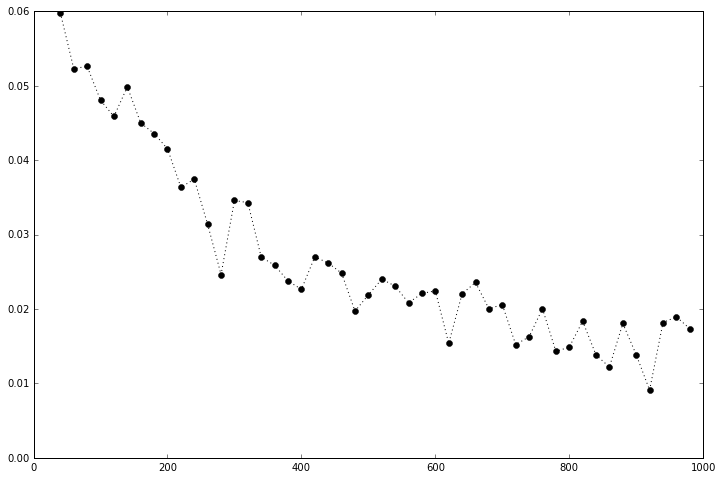

In [65]:
def EPR(EPRfiles,Pfiles):
    files = glob.glob(EPRfiles)
    pseq = np.loadtxt(Pfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = (epr[:,0]-epr[:,1])
        diff[np.isinf(diff)] = 0
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0]- (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)        
    return pseq,d_sum

def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,1]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D

time,hahn0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm  scan 2 no pi Hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm  scan 2 no pi Hahn Pulse Seq')
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm  scan 2 no pi Hahn *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\9-20-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm  scan 2 no pi Hahn Pulse Seq')
hahn0 = hahn0#-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(80,2600,-np.min(hahn0)))
t = np.arange(10,np.max(time),1)
#plt.plot(t,T2Fit(t,*opt0),'b-')
plt.plot(time[1:],hahn0[1:]/np.mean(hahn1[-8:]),'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

[   7210.52303693     829.03557003  162294.17326081]
(165817.08333333334, 0.0024557568499030086, 0.0073332945693283568)


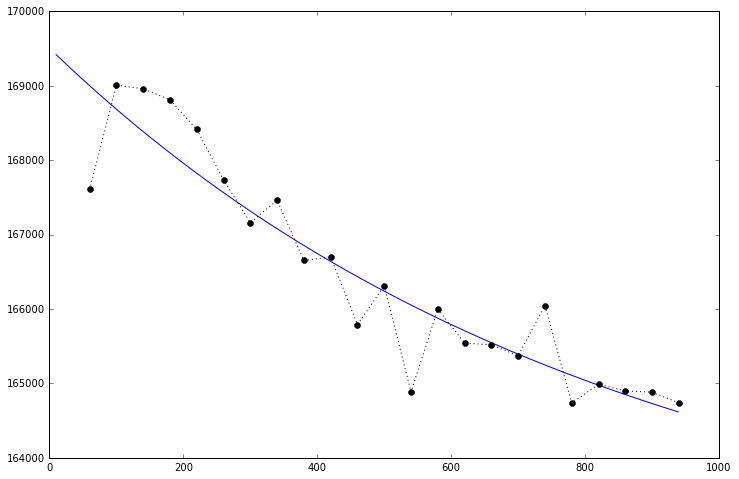

In [84]:
def EPR(EPRfiles,Pfiles):
    files = glob.glob(EPRfiles)
    pseq = np.loadtxt(Pfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = (epr[:,0]-epr[:,1])
        diff[np.isinf(diff)] = 0
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0]- (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)        
    return pseq,d_sum

def EPR_NoRef(EPRfiles,Pfiles):
    pseq = np.loadtxt(Pfiles)
    files = glob.glob(EPRfiles)
    d_sum = np.zeros((pseq.shape[0],))
    l = pseq.shape[0]
    for f in files:
        epr = np.loadtxt(f)
        diff = epr[:,0]
        diff = np.nan_to_num(diff)
        diff.resize(((diff.shape[0] - (diff.shape[0] % l)),1))
        diff = np.reshape(diff,(pseq.shape[0],-1),order='F')
        d_sum += np.sum(diff,axis=1)
        
    return pseq,d_sum

def T2Fit(t,C,tau,D):
    return C*np.exp(-t/tau)+D

time,hahn0 = EPR(r'C:\Users\Ouyang Group\Documents\Data\9-21-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm 2 hahn  *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\9-21-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm 2 hahn  Pulse Seq')
time,hahn1 = EPR_NoRef(r'C:\Users\Ouyang Group\Documents\Data\9-21-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm 2 hahn  *[0-9]',
              r'C:\Users\Ouyang Group\Documents\Data\9-21-16\MNP on CPW 5mW scan 2 x42 y100 -4dbm 2 hahn  Pulse Seq')
hahn0 = hahn0#-np.min(hahn0)
opt0,cov0 = curve_fit(T2Fit,time[1:],hahn1[1:],maxfev=5500,p0=(80,2600,-np.min(hahn0)))
t = np.arange(10,np.max(time),1)
plt.plot(t,T2Fit(t,*opt0),'b-')
plt.plot(time[1:],hahn1[1:],'ko:')
print opt0
print (np.mean(hahn1),1/np.sqrt(np.mean(hahn1)),np.std(hahn1[-20:])/np.mean(hahn1[-20:]))

In [85]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\9-21-16\MNP on CPW scan 1 x40 y97 RF sweep 3')
print (np.mean(t[1:,1]),np.std(t[1:,1]))
print (np.std(t[1:,1])/np.mean(t[1:,1]),1/np.sqrt(np.mean(t[1:,1])))

(201730.40404040404, 1865.5685943394565)
(0.009247830554911329, 0.002226457045553458)


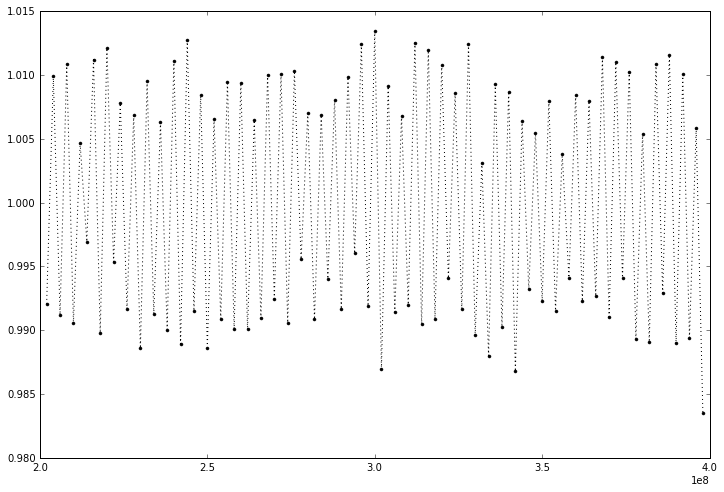

In [86]:
plt.plot(t[1:,0],t[1:,1]/np.mean(t[1:,1]),'k.:')

In [73]:
t = np.loadtxt(r'C:\Users\Ouyang Group\Documents\Data\9-21-16\MNP on CPW scan 1 x40 y97 RF sweep 4')
print (np.mean(t[1:,1]),np.std(t[1:,1]))
print (np.std(t[1:,1])/np.mean(t[1:,1]),1/np.sqrt(np.mean(t[1:,1])))

(227148.55778894472, 480.19934661511525)
(0.0021140321175241311, 0.0020981909434787055)


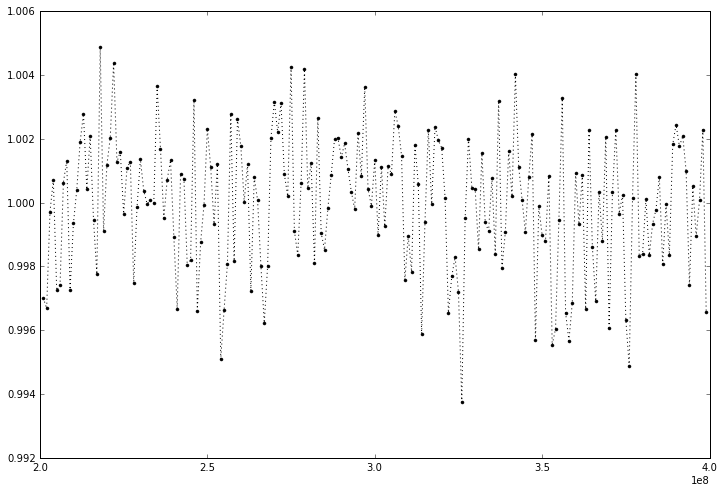

In [74]:
plt.plot(t[1:,0],t[1:,1]/np.mean(t[1:,1]),'k.:')